In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from multiprocessing import Pool

In [31]:
img_path = '/data/ishan/Raw_Datasets_Segmentation/LaPa/images'
mask_path = '/data/ishan/Raw_Datasets_Segmentation/LaPa/masks'
standardized_mask_path = '/data/ishan/Raw_Datasets_Segmentation/LaPa/standardized_masks'
img_file_names = sorted([f for f in os.listdir(img_path)])
mask_file_names = sorted([f for f in os.listdir(mask_path)])
standardized_mask_file_names = sorted([f for f in os.listdir(standardized_mask_path)])

img_files = [os.path.join(img_path, file_name) for file_name in img_file_names]
mask_files = [os.path.join(mask_path, file_name) for file_name in mask_file_names]
standardized_mask_files = [os.path.join(standardized_mask_path, file_name) for file_name in standardized_mask_file_names]


In [28]:
labels_found = []
labels_dict = {}
len(mask_file_names)

18668

In [8]:
# for a in range(len(img_files[:100])):
counter = 0
a = 0
while len(labels_dict) < 11:
# for a in range(len(img_files[:100])):
    mask = cv2.imread(mask_files[a], cv2.IMREAD_GRAYSCALE)
    unique_labels = np.unique(mask)
    for label in unique_labels:
        if label not in labels_found:
            labels_found.append(label)
            labels_dict[label] = []
        labels_dict[label].append(a)
    if counter % 100 == 0:
        print(counter)
    a += 1
    counter += 1

0


In [47]:
a = 90
img_file_names[a], mask_file_names[a], standardized_mask_file_names[a]

('10049620463_0.jpg', '10044911263_3.png', '10049620463_0_mask.png')

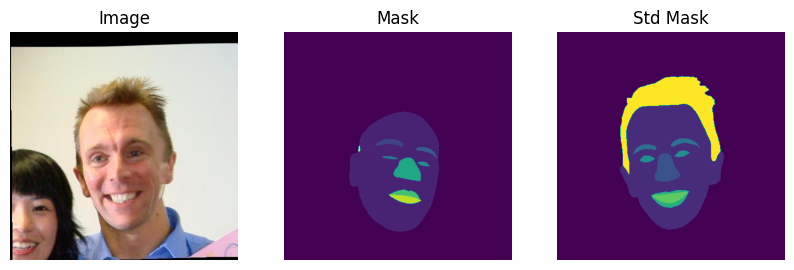

[0 1 2 3 4 5 6 8]
0


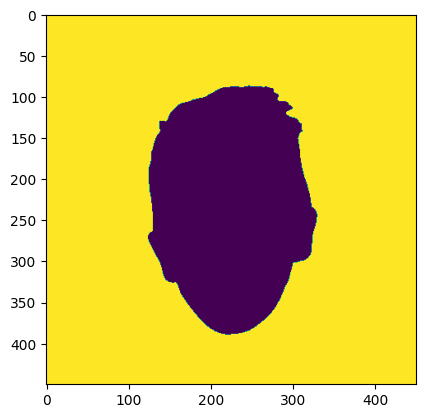

1


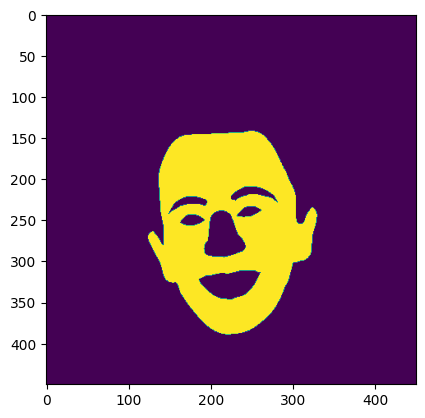

2


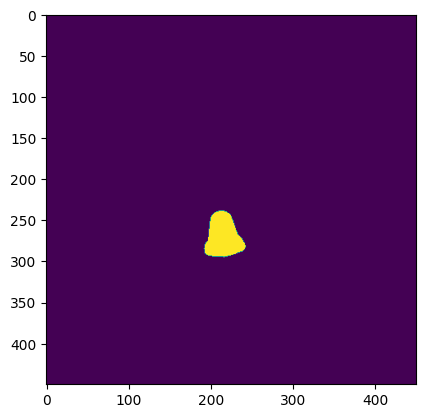

3


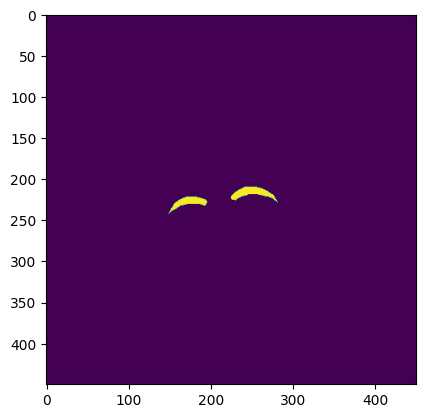

4


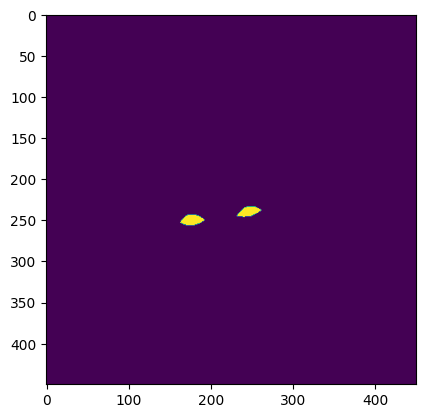

5


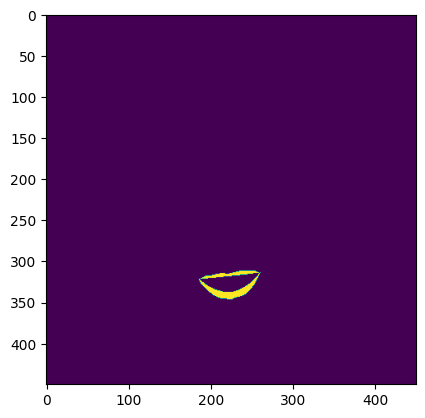

6


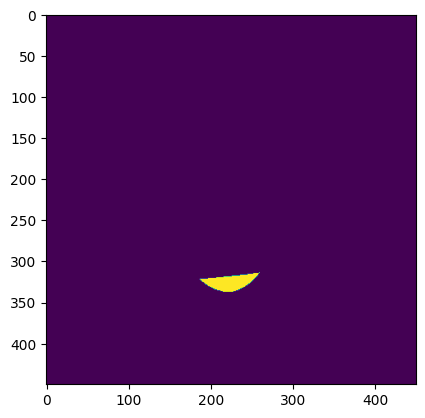

8


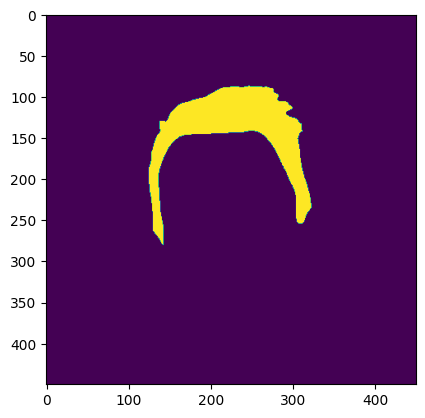

In [54]:
a = 10190
# img_files[a], mask_files[a]

img = cv2.imread(img_files[a])
mask = cv2.imread(mask_files[a], cv2.IMREAD_GRAYSCALE)
std_mask = cv2.imread(standardized_mask_files[a], cv2.IMREAD_GRAYSCALE)

mask_color = cv2.imread(mask_files[a])
fig, axs = plt.subplots(1,3, figsize=(10,10))
# Display the first image in the first subplot
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Image")

# Display the second image in the second subplot
axs[1].imshow(mask)
axs[1].set_title("Mask")

axs[2].imshow(std_mask)
axs[2].set_title("Std Mask")

# Remove the axis labels
for ax in axs:
    ax.axis("off")
plt.show()

print(np.unique(std_mask))
for i in np.unique(std_mask):
    image_array_test = std_mask.copy()
    image_array_test_mono = np.where(image_array_test == i,1,0)
    print(i)
    plt.imshow(image_array_test_mono, cmap='viridis')
    plt.show()

# Testing LaPa Dataset

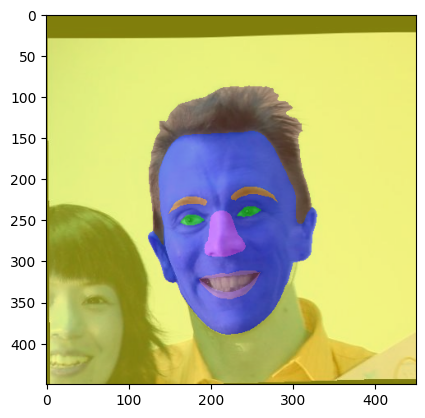

In [56]:
part_colors = [[24, 253, 255], [215, 50, 50], 
               [255, 65, 225],[0, 140, 255],
               [12, 255, 23],[167, 108, 188], 
               [66, 71, 147], [170, 255, 0],
               [19, 69, 139], [0, 255, 170],
               [0, 0, 255], [85, 219, 236], 
               [170, 0, 255], [0, 255, 255], [0, 170, 255],
               [0, 255, 255], [0, 255, 85], [0, 255, 170],
               [20, 20, 255], [0, 85, 255], [0, 170, 255],
               [0, 255, 255], [0, 255, 255], [0, 255, 255]]

im = img
vis_im = im.copy().astype(np.uint8)
vis_parsing_anno = std_mask.copy().astype(np.uint8)
vis_parsing_anno_color = np.zeros((vis_parsing_anno.shape[0], vis_parsing_anno.shape[1], 3)) + 255

num_of_class = np.max(vis_parsing_anno)

for pi in range(0, num_of_class + 1):
    index = np.where(vis_parsing_anno == pi)
    vis_parsing_anno_color[index[0], index[1], :] = part_colors[pi]

vis_parsing_anno_color = vis_parsing_anno_color.astype(np.uint8)
vis_im = cv2.addWeighted(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR), 0.5, vis_parsing_anno_color, 0.5, 0)
plt.imshow(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR))

In [57]:
cv2.imwrite('sample_1.png', vis_im)

True